# REAME
- [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) で機械学習の一番の流れを実装する


In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

# 簡易EDA

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['y'] = y

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
y                               178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [4]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
y                               0
dtype: int64

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


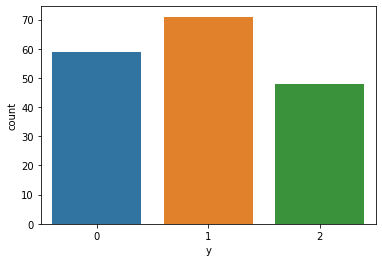

In [6]:

sns.countplot(df['y'])

# 予測モデルの構築
- 評価指標はAccuracyとする

In [7]:
from sklearn.model_selection import train_test_split

# クラスバランスにやや偏りがあるので層化抽出(Stratified Sampling)を行う
X_trainval, X_test, y_trainval, y_test = train_test_split(X,
                                                          y,
                                                          train_size=0.7,
                                                          random_state=0,
                                                          stratify=y)

print(X_trainval.shape, X_test.shape)
print(y_trainval.shape, y_test.shape)
print(np.bincount(y_trainval), np.bincount(y_test))

(124, 13) (54, 13)
(124,) (54,)
[41 50 33] [18 21 15]


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,
                                                      y_trainval,
                                                      train_size=0.7,
                                                      random_state=0,
                                                      stratify=y_trainval)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)
print(np.bincount(y_train), np.bincount(y_valid))

(86, 13) (38, 13)
(86,) (38,)
[28 35 23] [13 15 10]


# 予測モデルの構築

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print(f'Train Acc: {logreg.score(X_train, y_train):.4f}')
print(f'Valid Acc: {logreg.score(X_valid, y_valid):.4f}')

Train Acc: 0.9884
Valid Acc: 0.9474


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X_train, y_train)
print(f'Train Acc: {knn5.score(X_train, y_train):.4f}')
print(f'Valid Acc: {knn5.score(X_valid, y_valid):.4f}')

Train Acc: 0.8256
Valid Acc: 0.6842


In [11]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)
print(f'Train Acc: {svm.score(X_train, y_train):.4f}')
print(f'Valid Acc: {svm.score(X_valid, y_valid):.4f}')

Train Acc: 1.0000
Valid Acc: 0.3947


In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
print(f'Train Acc: {decision_tree.score(X_train, y_train):.4f}')
print(f'Valid Acc: {decision_tree.score(X_valid, y_valid):.4f}')

Train Acc: 1.0000
Valid Acc: 0.9211


# 最終モデルの作成と評価

In [13]:
final_model = LogisticRegression()

final_model.fit(X_trainval, y_trainval)
print(f'Trainval Acc: {final_model.score(X_trainval, y_trainval):.4f}')

Trainval Acc: 0.9839


In [14]:
print(f'Test Acc: {final_model.score(X_test, y_test):.4f}')

Test Acc: 0.9444


おわり